Script that shows some example and tests for psf_image_conv.

In [1]:
%run 'psf_image_conv.ipynb'

## Plotting a profile

theta (radians):  angular distance from center of profile <br>
fwhm (radians):  full-width-half-max for the profile -- optimally 3 arcsec for Dragonfly

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


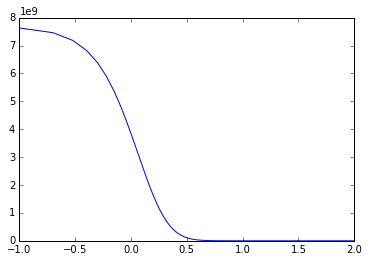

In [2]:
theta = np.arange(0,100,0.1)
fwhm = 2./206265.
flux = moffat(theta/206265, fwhm, beta=4)

plt.plot(np.log10(theta), flux)

Now plot a profile again, but with the axes in magnitudes and labelled.

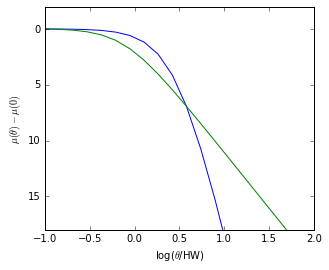

In [4]:
theta = 10.0**np.linspace(-1.0, 2.0, 20)
fwhm = 2
flux1 = moffat(theta, fwhm, beta=7)
mags1 = 2.5*np.log10(flux1[0])-2.5*np.log10(flux1)  # One moffat

plt.plot(np.log10(theta), mags1)

theta = 10.0**np.linspace(-1.0, 2.0, 20)
fwhm = 1
flux2 = moffat(theta, fwhm, beta=2)
mags2 = 2.5*np.log10(flux2[0])-2.5*np.log10(flux2)  # One moffat

plt.plot(np.log10(theta), mags2)

# Ignore Unicode equal comparison warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.gca().set_ylim(ymin=-2)
    plt.gca().set_ylim(ymax=18)
    xl0,xl1 = plt.gca().get_xlim()
    yl0,yl1 = plt.gca().get_ylim()
    plt.gca().set_aspect(0.83*(xl1-xl0)/(yl1-yl0))
    plt.gca().set_xlabel(r'log($\theta$/HW)')
    plt.gca().set_ylabel(r'$\mu(\theta) - \mu(0)$')
    plt.gca().invert_yaxis()

## Image convolution

### Picking values
At a comoving distance of 20 Mpc, the redshift is about z = 0.005 (from Ned's cosmology calculator).<br>
The Dragonfly pixels are 2.8 arcsec, and if we have 21 of them across, that's 2.8x21 arcsec = 60 arcsec, and at a scale of 0.104 kpc/", the boxlength is 0.104 x 60 kpc = 6.1 kpc.<br>
A normal FWHM for Dragonfly data is about 3 arcsec.

In [80]:
z = 0.005
kpc_to_arcsec_20Mpcaway = 0.104 #kpc/arcsec ; from 'Ned's cosmology calculator'
numpix = 2000 # approx number of pixels for Dragonfly CCD
angularpixsize_dragonfly = 2.8 #arcsec
boxlength = angularpixsize_dragonfly * numpix * kpc_to_arcsec_20Mpcaway / 1000. # Mpc
fwhm = 3.0*arcsec

print 'Dont forget to put the FWHM into radians! FWHM of 3 arcsec is: %s radians.'%fwhm
print 'For %s pixels a side, each of angular size %s arcsec, at a distance of 20 Mpc, the length along the side is %s Mpc.'%(numpix,angularpixsize_dragonfly,boxlength)

Dont forget to put the FWHM into radians! FWHM of 3 arcsec is: 1.45444104333e-05 radians.
For 2000 pixels a side, each of angular size 2.8 arcsec, at a distance of 20 Mpc, the length along the side is 0.5824 Mpc.


### but actually lets use less pixels because that's too large

Using a somewhat delta function to test the convolution.  The boxlength will be smaller because the numpix is smaller.

In [81]:
numpix = 20
img = np.zeros((numpix,numpix))
img[numpix/2,numpix/2] = 100  #img[numpix/2-2:numpix/2+2,numpix/2-2:numpix/2+2] = 1

boxlength = (angularpixsize_dragonfly*numpix*kpc_to_arcsec_20Mpcaway) / 1000. # Mpc

print 'For %s pixels a side, each of angular size %s arcsec,\
    at a distance of 20 Mpc, the length along the side is %s Mpc.'\
    %(numpix,angularpixsize_dragonfly,boxlength)

For 20 pixels a side, each of angular size 2.8 arcsec,    at a distance of 20 Mpc, the length along the side is 0.005824 Mpc.


integral before convolution: 100.0
STARTING convolution...
img shape: (20,20), boxlength: 0.005824 Mpc,numpix: 20,z: 0.005,kernel: 2MoffatAureole,fwhm: 1.45444104333e-05 arcsec. 

af: 0.02,mf: 0.98, m1f: 0.8,beta1: 7.0,beta2: 2.0,d0: 50.0
 Generating the 2Moffat or 2MoffatAureole kernel...

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
DEBUGGING: comoving distance (cm): 6.81709703692e+25
DEBUGGING: longlen (the boxlength in cm): 1.7970988672e+22
DEBUGGING: adist (comoving distance divided by cosmological factor): 6.78318113126e+25
DEBUGGING: image angle per pixel (arcsec): 2.71874227281
 Calculting PSF.

DEBUGGING: Integral of kernel (not normalized yet): 575592335421.0
DEBUGGING: Integral of kernel (normalized): 1.0
 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 2.0...
DEBUGGING: comoving distance (cm): 6.81709703692e+25
DEBUGGING: longlen (the boxlength in cm): 1.7970988672e+2

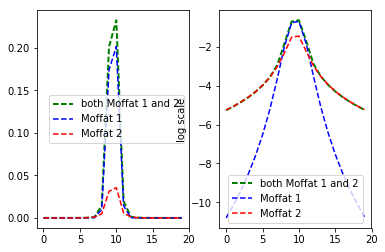

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
DEBUGGING: comoving distance (cm): 6.81709703692e+25
DEBUGGING: longlen (the boxlength in cm): 1.7970988672e+22
DEBUGGING: adist (comoving distance divided by cosmological factor): 6.78318113126e+25
DEBUGGING: image angle per pixel (arcsec): 2.71874227281
 Calculting PSF.

 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

FINISHED convolution.
integral after convolution: 100.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


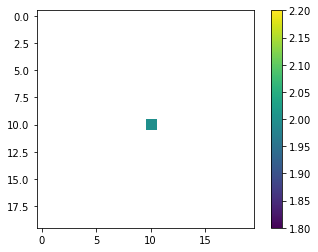

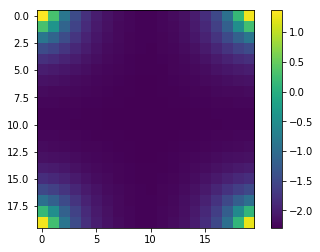

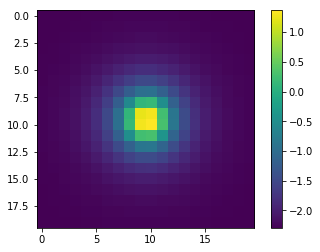

In [82]:
print 'integral before convolution: %s'%np.sum(img)

convolved2MoffatAureole = conv_image_abr(img,boxlength,numpix,z,'2MoffatAureole',fwhm,debug=True,plotchecks=True)

print 'integral after convolution: %s'%np.sum(convolved2MoffatAureole)

plt.imshow(np.log10(img),interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(np.log10(convolved2MoffatAureole),interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(np.log10(np.fft.fftshift(convolved2MoffatAureole)),interpolation='nearest') #https://dsp.stackexchange.com/questions/47249/result-of-inverse-fft-is-sometimes-shifted-in-real-space
plt.colorbar()
plt.show()

integral before convolution: 100.0
STARTING convolution...
img shape: (20,20), boxlength: 0.005824 Mpc,numpix: 20,z: 0.005,kernel: 2Moffat,fwhm: 1.45444104333e-05 arcsec. 

 Generating the 2Moffat or 2MoffatAureole kernel...

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
 Calculting PSF.

 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 2.0...
 Calculting PSF.

 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

FINISHED convolution.
integral after convolution: 100.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


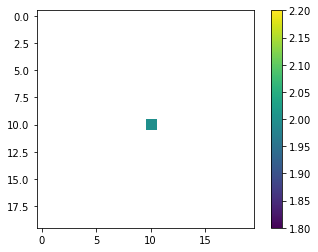

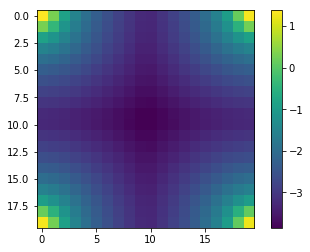

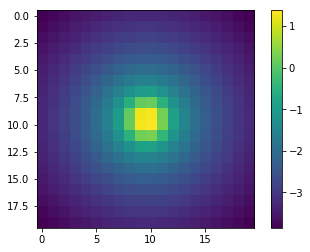

In [13]:
print 'integral before convolution: %s'%np.sum(img)

convolved2Moffat = conv_image_abr(img,boxlength,numpix,z,'2Moffat',fwhm,debug=False)

print 'integral after convolution: %s'%np.sum(convolved2Moffat)

plt.imshow(np.log10(img),interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(np.log10(convolved2Moffat),interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(np.log10(np.fft.fftshift(convolved2Moffat)),interpolation='nearest') #https://dsp.stackexchange.com/questions/47249/result-of-inverse-fft-is-sometimes-shifted-in-real-space
plt.colorbar()
plt.show()

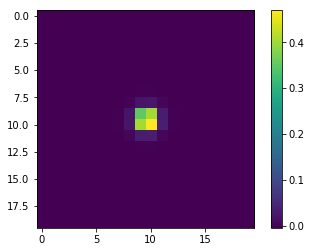

In [11]:
plt.imshow(np.fft.fftshift(convolved2Moffat)-np.fft.fftshift(convolved2MoffatAureole)) #https://dsp.stackexchange.com/questions/47249/result-of-inverse-fft-is-sometimes-shifted-in-real-space
plt.colorbar()
plt.show()

## Image convolution

### Picking values
At a comoving distance of 20 Mpc, the redshift is about z = 0.005 (from Ned's cosmology calculator).<br>
The Dragonfly pixels are 2.8 arcsec, and if we have 21 of them across, that's 2.8x21 arcsec = 60 arcsec, and at a scale of 0.104 kpc/", the boxlength is 0.104 x 60 kpc = 6.1 kpc.<br>
A normal FWHM for Dragonfly data is about 3 arcsec.

In [39]:
z = 0.005
kpc_to_arcsec_20Mpcaway = 0.104 #kpc/arcsec ; from 'Ned's cosmology calculator'

Now let's try it with a higher resolution (since the sky has infinite resolution), then imreduce it down to the Dragonfly resolution (like when the image is captured on the CCD).  We can compare that result to the one above.

Let's reduce the angularpixsize to 0.28 arcsec (10x less) and increase the numpix to 200 from 20(10x more), that leaves the boxlength the same size, but we'll have lots more pixels.

In [74]:
factor = 2
angularpixsize = angularpixsize_dragonfly / factor #arcsec, 10x dragonfly
fwhm = 3.0*arcsec

print 'Dont forget to put the FWHM into radians! FWHM of 3 arcsec is: %s radians.'%fwhm

Dont forget to put the FWHM into radians! FWHM of 3 arcsec is: 1.45444104333e-05 radians.


In [75]:
numpix = 20 * factor
img = np.zeros((numpix,numpix))
img[numpix/2,numpix/2] = 100  #img[numpix/2-2:numpix/2+2,numpix/2-2:numpix/2+2] = 1

boxlength = (angularpixsize*numpix*kpc_to_arcsec_20Mpcaway) / 1000. # Mpc

print 'For %s pixels a side, each of angular size %s arcsec,\
    at a distance of 20 Mpc, the length along the side is %s Mpc.'\
    %(numpix,angularpixsize_dragonfly,boxlength)

For 40 pixels a side, each of angular size 2.8 arcsec,    at a distance of 20 Mpc, the length along the side is 0.005824 Mpc.


integral before convolution: 100.0

STARTING convolution...
img shape: (40,40), boxlength: 0.005824 Mpc,numpix: 40,z: 0.005,kernel: 2MoffatAureole,fwhm: 1.45444104333e-05 arcsec. 

af: 0.02,mf: 0.98, m1f: 0.8,beta1: 7.0,beta2: 2.0,d0: 50.0
 Generating the 2Moffat or 2MoffatAureole kernel...

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
DEBUGGING: comoving distance (cm): 6.81709703692e+25
DEBUGGING: longlen (the boxlength in cm): 1.7970988672e+22
DEBUGGING: adist (comoving distance divided by cosmological factor): 6.78318113126e+25
DEBUGGING: image angle per pixel (arcsec): 1.35937113641
 Calculting PSF.

DEBUGGING: Integral of kernel (not normalized yet): 2.30236934169e+12
DEBUGGING: Integral of kernel (normalized): 1.0
 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 2.0...
DEBUGGING: comoving distance (cm): 6.81709703692e+25
DEBUGGING: longlen (the boxlength in cm): 1.797098867

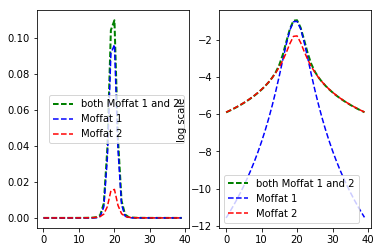

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
DEBUGGING: comoving distance (cm): 6.81709703692e+25
DEBUGGING: longlen (the boxlength in cm): 1.7970988672e+22
DEBUGGING: adist (comoving distance divided by cosmological factor): 6.78318113126e+25
DEBUGGING: image angle per pixel (arcsec): 1.35937113641
 Calculting PSF.

 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

FINISHED convolution.
integral after convolution: 100.0



In [76]:
print 'integral before convolution: %s\n'%np.sum(img)

convolved2MoffatAureole_highres = conv_image_abr(img,boxlength,numpix,z,'2MoffatAureole',fwhm,debug=True,plotchecks=True)

print 'integral after convolution: %s\n'%np.sum(convolved2MoffatAureole)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


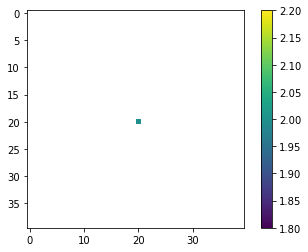

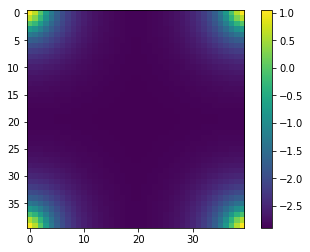

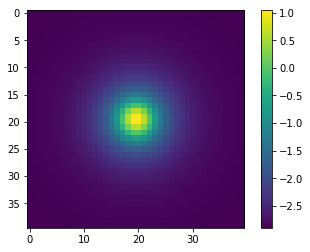

In [77]:
plt.imshow(np.log10(img),interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(np.log10(convolved2MoffatAureole_highres),interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(np.log10(np.fft.fftshift(convolved2MoffatAureole_highres)),interpolation='nearest') #https://dsp.stackexchange.com/questions/47249/result-of-inverse-fft-is-sometimes-shifted-in-real-space
plt.colorbar()
plt.show()

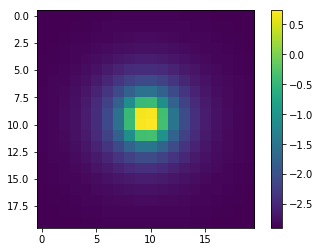

In [78]:
plt.imshow(np.log10(imreduce(np.fft.fftshift(convolved2MoffatAureole_highres), factor)),interpolation='nearest') #https://dsp.stackexchange.com/questions/47249/result-of-inverse-fft-is-sometimes-shifted-in-real-space
plt.colorbar()
plt.show() 

By changing the factor, well demonstrates that if the actual size of the object in the sky is smaller than the dragonfly resolution, that greatly affects how much the light gets diffracted (compare the reduced image just above with the one produced originally).

Need to put the simulation at very high resolution, then smooth it to mimic the seeing limit 
>i.e. [atmospheric turbulence] leads to slight variations of the position of stars on the sky, often the appearance of multiple “copies” of the same star close together (called speckles) and to slight variations in the brightness, (called scintillation).  

(http://www.ita.uni-heidelberg.de/~dullemond/lectures/obsastro_2011/chap_turb.pdf)

According to the Dragonfly paper, the seeing limit is about 1.5 arcsec.  I think even just making sure that the EAGLE simulation is placed at a distance where the pixel angular scale corresponds to 1.5 arcsec or so would work well.  Honestly, it's not that different from the Dragonfly pixel scale, but still.  It's about a factor of 2.